In [2]:
import time
import concurrent.futures
from tqdm import tqdm
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import PIL
from PIL.ImageDraw import Draw

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data_path = "/content/gdrive/My Drive/FinalProject/CrowdCounting1.png"

In [5]:
# EfficientDet model
MODEL_PATH = 'https://tfhub.dev/tensorflow/efficientdet/d0/1'

In [6]:
def reconstruct_path(image_id: int) -> str:
    image_id = str(image_id).rjust(6, '0')
    return f'../input/crowd-counting/frames/frames/seq_{image_id}.jpg'


def detect_objects(path: str, model) -> dict:
    image_tensor = tf.image.decode_jpeg(
        tf.io.read_file(path), channels=3)[tf.newaxis, ...]
    return model(image_tensor)
def count_persons(path: str, model, threshold=0.) -> int:
    results = detect_objects(path, model)
    # Class ID 1 = "person"
    return (results['detection_classes'].numpy()[0] == 1)[np.where(
        results['detection_scores'].numpy()[0] > threshold)].sum()
def draw_bboxes(image_path, data: dict, threshold=0.) -> PIL.Image:
    image = PIL.Image.open(image_path)
    draw = Draw(image)

    im_width, im_height = image.size

    boxes = data['detection_boxes'].numpy()[0]
    classes = data['detection_classes'].numpy()[0]
    scores = data['detection_scores'].numpy()[0]

    for i in range(int(data['num_detections'][0])):
        if classes[i] == 1 and scores[i] > threshold:
            ymin, xmin, ymax, xmax = boxes[i]
            (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                          ymin * im_height, ymax * im_height)
            draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)],
                      width=4, fill='red')

    return image
def set_display():
    """Function sets display options for charts and pd.DataFrames.
    """
    # Plots display settings
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = 12, 8
    plt.rcParams.update({'font.size': 14})
    # DataFrame display settings
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.options.display.float_format = '{:.4f}'.format

Using a pre-trained model, the code can identify and count people in photos, create bounding boxes around people it detects, and configure display parameters by charts.

In [7]:
set_display()

In [8]:
# Load the model.
detector = hub.load(MODEL_PATH)

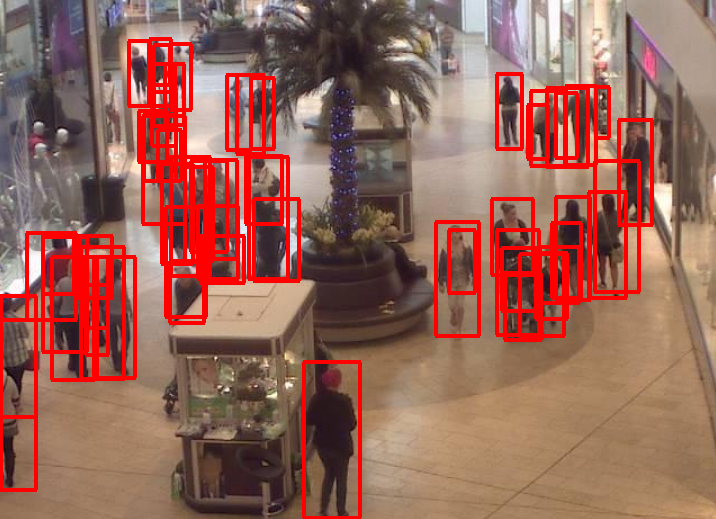

In [9]:
results = detect_objects(data_path, detector)
draw_bboxes(data_path, results)

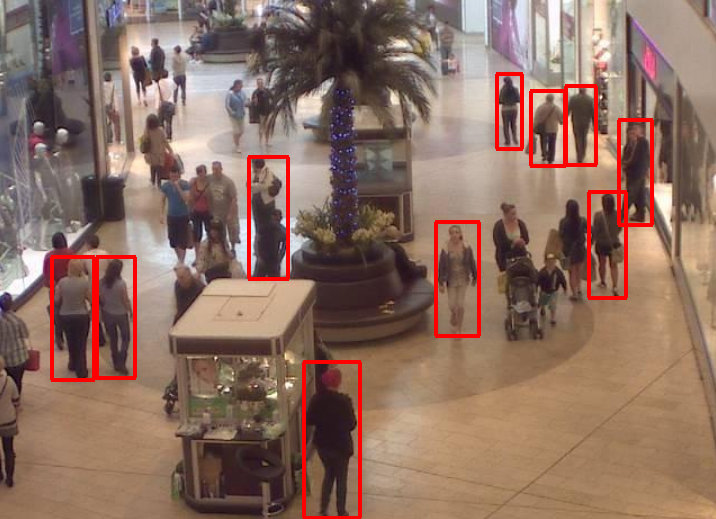

In [10]:
draw_bboxes(data_path, results, threshold=0.5)

When the threshold is high, the algorithm only chooses the most noticeable items to be in the foreground, underestimating the total number of people.

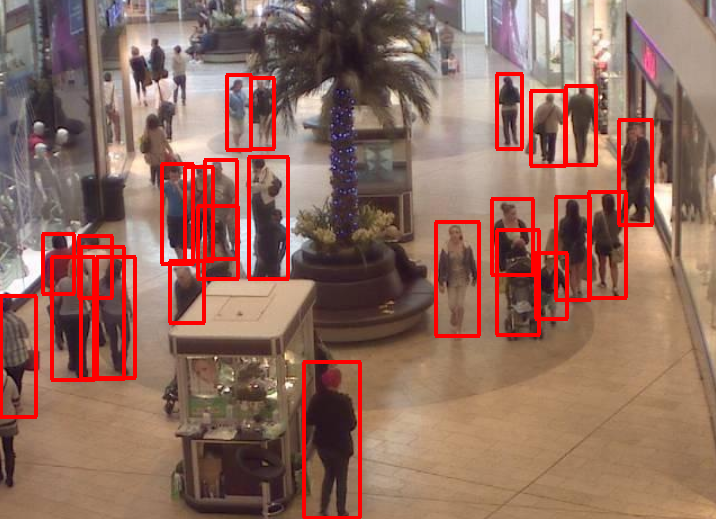

In [11]:
draw_bboxes(data_path, results, threshold=0.25)

The model works best at counting persons who are in the foreground and middle of the image when the threshold is set relatively low.
Background objects are largely ignored.

#Motivation/urgency cases and future predictions

Crowd counting is calculate the crowd at a certain location automatically.

Motivation or urgency cases that rban planners can benefit from crowd counting technology by using the information it provides about human movement patterns to better design public spaces and transit. This information can be utilized in company to analyze markets and improve client flow in establishments.


Future directions:

**Creating More Accurate Models**: Creating models with improved counting accuracy in low light or extremely crowded situations.

**Connecting crowd counting technology with Internet of Things (IoT) devices**: allows real-time data to be accessed by a variety of stakeholders, such as emergency response teams and event planners.

**Use in Healthcare**: Using technology to track adherence to public health directives, such keeping a physical distance from one another in public areas during a pandemic.

**Big Data Analytics**: By analyzing crowd behavior over time and space, big data analytics may improve event planning and urban planning.

**Creating Early Warning Systems**: Creating early warning systems that are able to identify possible risks in crowds, such congestion, in order to initiate evacuations or other preventative actions.
